# First-pass analyses
Jan2023 \
author: Inês Laranjeira

In [1]:
"""
IMPORTS
"""
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pickle

# --Get my functions
functions_path = "../Functions/"
os.chdir(functions_path)
from one_functions_generic import get_trials, performance_metrics, bin_frac, prepro

from one.api import ONE
#one = ONE(base_url='https://openalyx.internationalbrainlab.org')  # public database
one = ONE(base_url='https://alyx.internationalbrainlab.org')


In [3]:
data_path

'../DATA/'

## Get data

In [4]:
""" 
GET LEARNING DATA
"""
trials_dir = '/home/ines/repositories/representation_learning_variability/DATA/'
trials = pickle.load(open(trials_dir + "learning_private_one", "rb"))
trials = prepro(trials)

TypeError: a bytes-like object is required, not 'str'

In [150]:
#all_trials = bin_frac(trials, 20)

/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Functions/one_functions_generic.py:367: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(subject_data)
/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Functions/one_functions_generic.py:367: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(subject_data)
/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Functions/one_functions_generic.py:367: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(subject_data)
/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Functions/one_functions_generic.py:367: 

In [151]:
prof = all_trials.loc[(all_trials['bin_frac']==20)] # & (all_trials['contrast']>=0.5)

In [140]:
np.nanmean(prof['correct'])

0.7887537993920972

In [152]:
animals = prof['subject_nickname'].unique()
iti_correct = []
iti_incorrect = []
for a, animal in enumerate(animals):
    animal_data = prof.loc[prof['subject_nickname']==animal].sort_values(by=['session_number', 'trial_id'])
    stimOn = np.array(animal_data['stimOn_times'])[1:]
    feedback = np.array(animal_data['feedback_times'])[:-1]
    correct = np.where(animal_data['correct']==1)
    incorrect = np.where(animal_data['correct']==0)
    iti_animal = stimOn - feedback
    if a == 0:
        iti_correct = iti_animal[correct[0][:-1]]
        iti_incorrect = iti_animal[incorrect[0][:-1]]
    else:
        iti_correct = np.append(iti_correct, iti_animal[correct[0][:-1]])
        iti_incorrect = np.append(iti_incorrect, iti_animal[incorrect[0][:-1]])

In [153]:
print(np.nanmedian(iti_correct))
print(np.nanmedian(iti_incorrect))

3.230850499999633
4.077499499999931


In [116]:
np.nanmean(prof['correct'])

0.7373573982632385

In [48]:
animal_data['feedback_times']

633    1665.067200
634    1668.706400
288    3814.120899
635    1671.837300
636    1674.999900
          ...     
740    2792.380900
741    2797.822300
742    2808.074800
743    2811.652100
744    2815.523600
Name: feedback_times, Length: 119, dtype: float64

In [5]:
# Exclude mice based on date or list of subjects
trials_date = trials.copy()
trials_date['session_date'] = pd.to_datetime(trials_date['session_date'], format='%Y-%m-%d')
#new_trials = trials_date.loc[trials_date.session_date< '2020-03-23']
#new_trials = trials_date.loc[trials_date.subject_nickname.isin(subjects)]

## Learning curves

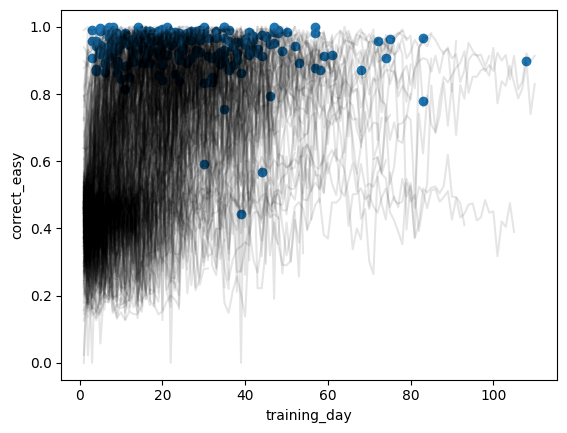

In [6]:

mouse_perf = pd.DataFrame(trials.groupby(['subject_nickname', 'training_day'])
                        ['correct_easy'].mean())
mouse_perf = mouse_perf.reset_index(level=[0, 1])
sns.lineplot(x='training_day', y='correct_easy', data=mouse_perf, estimator=None, units='subject_nickname', color='black', alpha=0.1)

trials_training = trials.loc[trials['training_day']==trials['training_time']+1]
mouse_time = pd.DataFrame(trials_training.groupby(['subject_nickname',  'training_time'])
                        ['correct_easy'].mean())
mouse_time = mouse_time.reset_index(level=[0, 1])

plt.scatter(x='training_time', y='correct_easy', data=mouse_time)
#plt.xlim([0,60])


In [ ]:
plt.hist(mouse_perf[''])

(array([71., 85., 70., 49., 23., 13.,  7.,  4.,  1.,  2.]),
 array([  3. ,  13.5,  24. ,  34.5,  45. ,  55.5,  66. ,  76.5,  87. ,
         97.5, 108. ]),
 <BarContainer object of 10 artists>)

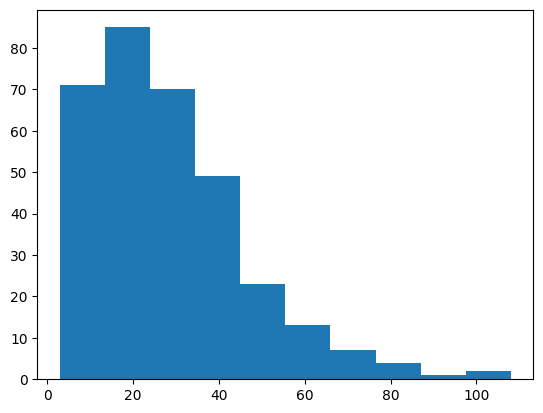

In [11]:
mouse_perf = pd.DataFrame(trials.groupby(['subject_nickname', 'training_time'])
                        ['correct_easy'].mean())
mouse_perf = mouse_perf.reset_index(level=[0, 1])
plt.hist(mouse_perf['training_time'])

<AxesSubplot: xlabel='training_day', ylabel='correct_easy'>

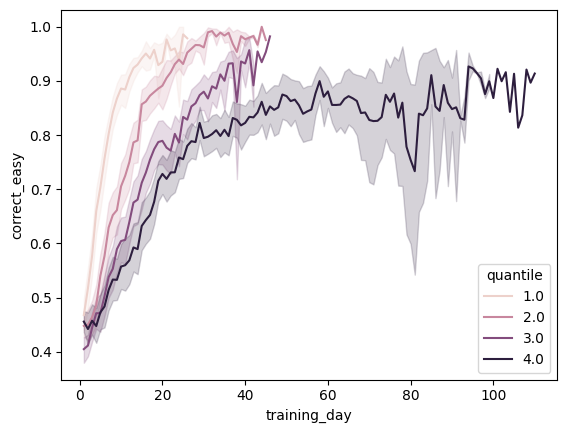

In [6]:

mouse_perf = pd.DataFrame(trials.groupby(['subject_nickname', 'training_day', 'quantile'])
                        ['correct_easy'].mean())
mouse_perf = mouse_perf.reset_index(level=[0, 1, 2])
sns.lineplot(x='training_day', y='correct_easy', data=mouse_perf, hue='quantile')
#plt.xlim([0,60])

In [9]:
""" Smooth data across session """

session_number = 1
use_df = trials.loc[trials['training_day']==session_number]
window_size = 10
use_df['smooth_correct_easy'] = use_df['correct_easy'].rolling(window_size).mean()
use_df['smooth_response'] = use_df['response'].rolling(window_size).median()
use_df['smooth_reaction'] = use_df['reaction'].rolling(window_size).median()

/tmp/ipykernel_33893/3237227107.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_df['smooth_correct_easy'] = use_df['correct_easy'].rolling(window_size).mean()
/tmp/ipykernel_33893/3237227107.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_df['smooth_response'] = use_df['response'].rolling(window_size).median()
/tmp/ipykernel_33893/3237227107.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

(0.0, 400.0)

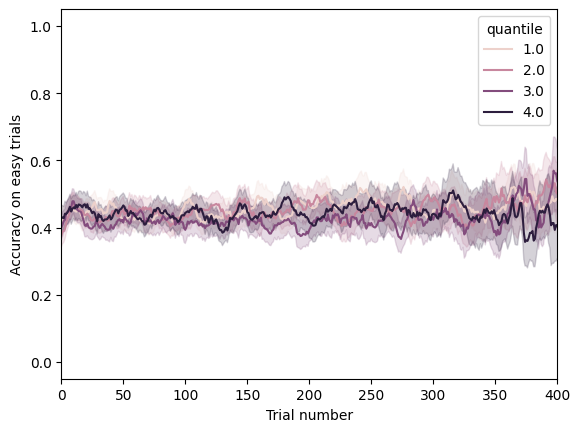

In [10]:
sns.lineplot(x='trial_id', y='smooth_correct_easy', hue='quantile', data=use_df)
plt.xlim([0, np.max(use_df['trial_id']) - np.max(use_df['trial_id'])/6])
plt.xlabel('Trial number')
plt.ylabel('Accuracy on easy trials')
plt.xlim([0, 400])

## Plot behavior along session 
### Smooth across trials

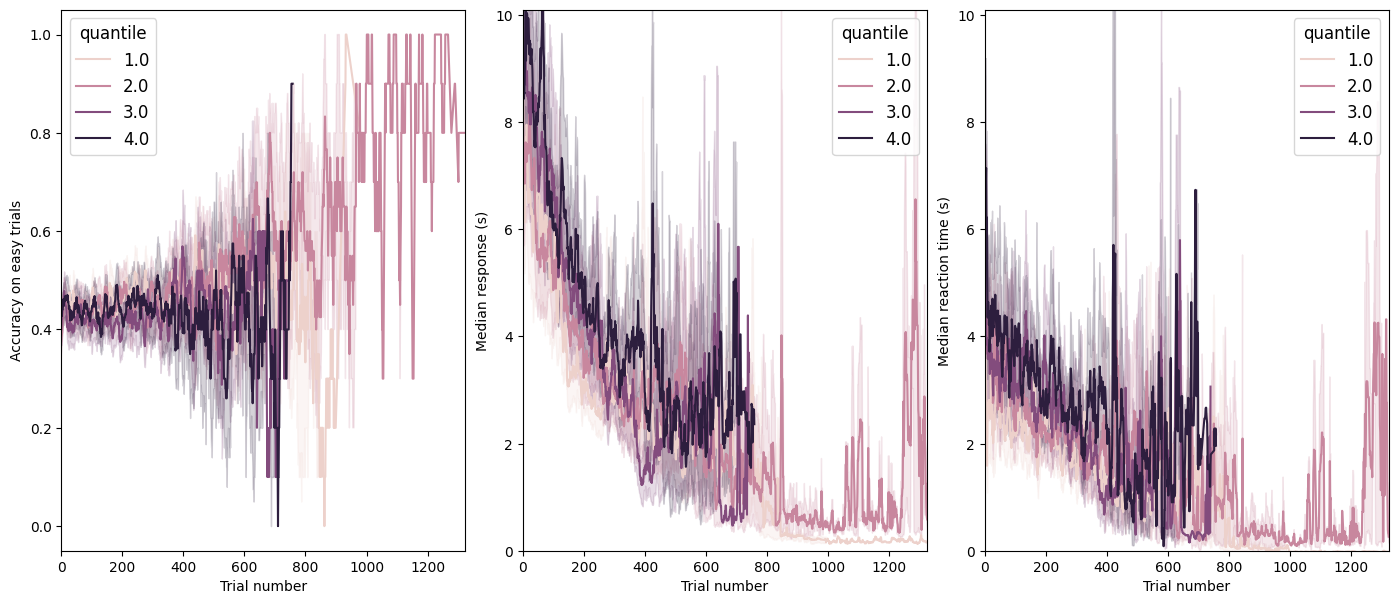

In [11]:
print = False

if os.path.expanduser('~') == 'C:\\Users\\User':
    figpath = os.path.join('G:\\My Drive\\CCU\\PhD project\\Projects\\Learning variability')
else:
    figpath = os.path.join(os.path.expanduser('~'), 'Google Drive/O meu disco/CCU/PhD project/Projects/Learning variability')


fig, ax = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False, figsize=[14, 6])
plt.tight_layout()
plt.rc('font', size=12)

# Performance on easy trials
sns.lineplot(x='trial_id', y='smooth_correct_easy', hue='quantile', data=use_df, ax=ax[0])
ax[0].set_xlim([0, np.max(use_df['trial_id']) - np.max(use_df['trial_id'])/6])
ax[0].set_xlabel('Trial number')
ax[0].set_ylabel('Accuracy on easy trials')

# Response times
sns.lineplot(x='trial_id', y='smooth_response', hue='quantile', data=use_df, ax=ax[1])
ax[1].set_xlim([0, np.max(use_df['trial_id']) - np.max(use_df['trial_id'])/6])
ax[1].set_xlabel('Trial number')
ax[1].set_ylabel('Median response (s)')
ax[1].set_ylim([0, np.max(use_df['smooth_response'])/6 ])

# Reaction times
sns.lineplot(x='trial_id', y='smooth_reaction', hue='quantile', data=use_df, ax=ax[2])
ax[2].set_xlim([0, np.max(use_df['trial_id']) - np.max(use_df['trial_id'])/6])
ax[2].set_xlabel('Trial number')
ax[2].set_ylabel('Median reaction time (s)')
ax[2].set_ylim([0, np.max(use_df['smooth_response'])/6])

if print == True:
    if os.path.expanduser('~') == 'C:\\Users\\User':
        fig.savefig(os.path.join(figpath, 'session_smooth_performance.png'), dpi=500)
    else:
        fig.savefig(os.path.join(figpath, 'session_smooth_performance.png'), dpi=500)


## Summary statistics per session

<AxesSubplot: xlabel='quantile', ylabel='correct_easy'>

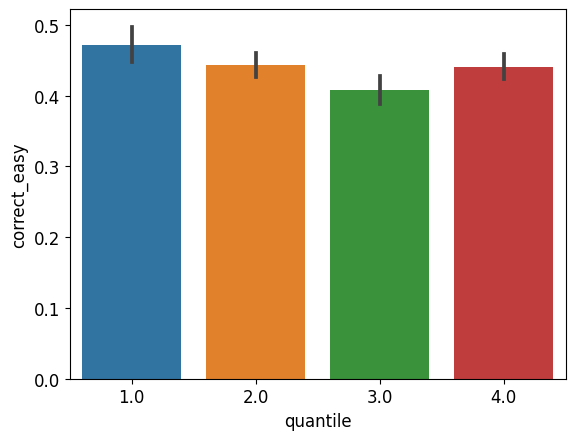

In [26]:
var = 'correct_easy'

mouse_perf = pd.DataFrame(trials.groupby(['subject_nickname', 'training_day', 'quantile'])
                        [var].mean())
mouse_perf = mouse_perf.reset_index(level=[0, 1, 2])

use_perf = mouse_perf.loc[mouse_perf['training_day']==1]

sns.barplot(x='quantile', y=var, data=use_perf)


## Learning curves per fraction of training time

In [8]:
new_trials = bin_frac(trials, bin_num=5)

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:367: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(subject_data)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:367: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(subject_data)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:367: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(subject_data)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:367: FutureWarning: The frame.append method is deprecated and will be removed from pandas

(0.0, 5.0)

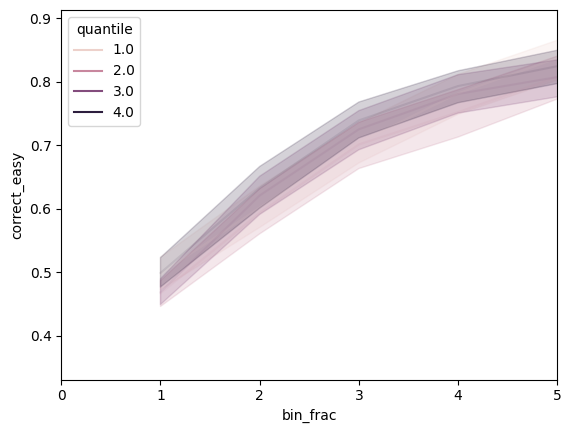

In [10]:
var = 'correct_easy'
mouse_perf = pd.DataFrame(new_trials.groupby(['subject_nickname', 'bin_frac', 'quantile'])
                        [var].mean())
mouse_perf = mouse_perf.reset_index(level=[0, 1, 2])
sns.lineplot(x='bin_frac', y=var, data=mouse_perf, hue='quantile', color='black', alpha=0.1)
plt.xlim([0, 5])